In [2]:
import os, sys

# Open a file
path = "/Users/andaks/Documents/oil_gas_train_test"
dirs = os.listdir( path )

# This would print all the files and directories
for file in dirs:
   print(file)

CDEV.xlsx
COG.xlsx
CNX.xlsx
FANG.xlsx
AR.xlsx
TALO.xlsx
HES.xlsx
MTDR.xlsx
GDP.xlsx
WLL.xlsx
CRK.xlsx
LPI.xlsx
SBOW.xlsx
RRC.xlsx
CLR.xlsx
APA.xlsx
EOG.xlsx
VNOM.xlsx
DVN.xlsx
EQT.xlsx
MUR.xlsx
CHK.xlsx
SD.xlsx
OVV.xlsx
MGY.xlsx
ESTE.xlsx
SWN.xlsx
AMPY.xlsx
NOG.xlsx
MRO.xlsx
DEN.xlsx
BSM.xlsx
LONE.xlsx
XOG.xlsx
CRC.xlsx
BCEI.xlsx
MNRL.xlsx
BRY.xlsx
SM.xlsx
PVAC.xlsx
PXD.xlsx
COP.xlsx
PDCE.xlsx
WTI.xlsx
OAS.xlsx
EGY.xlsx
XEC.xlsx
TPL.xlsx
BATL.xlsx
REI.xlsx
CPE.xlsx
MCF.xlsx


In [3]:
import pandas as pd

In [4]:
#read excel files, convert them to pandas data frames

# make an empty data frame
d = {'Name': [0], 'Date': [0], 'Revenue': [0], 'Operating Income': [0] }
df = pd.DataFrame(data = d)

# read all the files with data and join them together
for file in dirs:
#use cringe name lol
    lol = pd.read_excel("/Users/andaks/Documents/oil_gas_train_test/" + str(file))
# delete empty columns and rows
    lol = lol.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
           'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis = 1)
    lol = lol.drop(lol.index[:26])
    lol = lol.loc[[26, 28, 42]]
    
# rename rows
    lol.index = ["Date", "Revenue", 'Operating Income']
    lol = lol.T

# add stock name
    lol['Name'] = str(file).split('.')[0]

# add its own color (for further work)
    import random
    col = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
    lol['Color'] = col[0]
    
# add stock data to the main data set
    df = pd.concat([df, lol])

# remove empty first line
df = df.iloc[1: , :]
df = df.reset_index(drop = True)

df

,Name,Date,Revenue,Operating Income,Color
0,CDEV,Q1 '11 A,0,0,#9A49F8
1,CDEV,Q2 '11 A,0,0,#9A49F8
2,CDEV,Q3 '11 A,0,0,#9A49F8
3,CDEV,Q4 '11 A,0,0,#9A49F8
4,CDEV,Q1 '12 A,0,0,#9A49F8
...,...,...,...,...,...
2179,MCF,Q2 '20 A,17.842,-21.275,#DA0A96
2180,MCF,Q3 '20 A,31.348,2.521,#DA0A96
2181,MCF,Q4 '20 A,29.157,-0.874,#DA0A96
2182,MCF,Q1 '21 A,59.95,13.62,#DA0A96


In [5]:
df[20:]

,Name,Date,Revenue,Operating Income,Color
20,CDEV,Q1 '16 A,23.75,-6.105,#9A49F8
21,CDEV,Q2 '16 A,29.39,0.056,#9A49F8
22,CDEV,Q3 '16 A,29.273,-1.775,#9A49F8
23,CDEV,Q4 '16 A,30.771,-1.932,#9A49F8
24,CDEV,Q1 '17 A,60.7,7.653,#9A49F8
...,...,...,...,...,...
2179,MCF,Q2 '20 A,17.842,-21.275,#DA0A96
2180,MCF,Q3 '20 A,31.348,2.521,#DA0A96
2181,MCF,Q4 '20 A,29.157,-0.874,#DA0A96
2182,MCF,Q1 '21 A,59.95,13.62,#DA0A96


In [6]:
import numpy as np

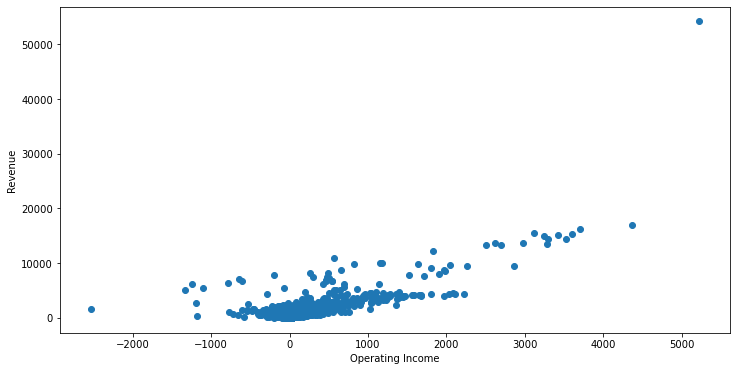

In [7]:
import matplotlib.pyplot as plt 

# Let's vizualise this data
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(df['Operating Income'], df['Revenue']) 
ax.set_xlabel('Operating Income')
ax.set_ylabel('Revenue')
plt.show() 

## We have a visible trend (the higher oper income, the higher revenue and vice versa)

 There are two outliers in our data - they are based in the left down and right up positions. We should drop them to have a better picture.
 
 Two good metrics here are roc_auc and log_loss. Log_loss metric is usefull with financial data as it helps to find differences in percents.
 
 We should try to imply data seasonality and make different plots for different time periods. We have to check this hypothesis.

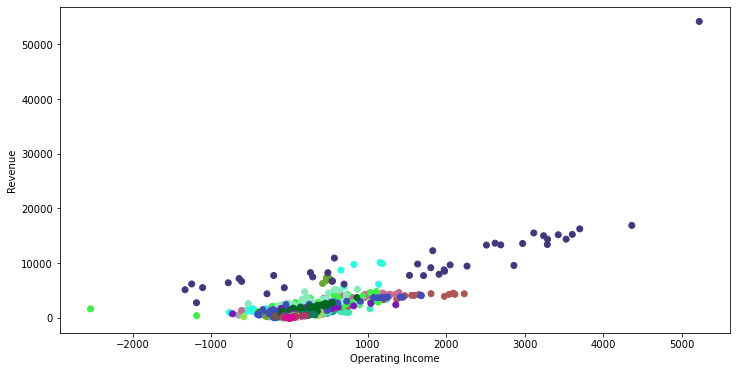

In [8]:
import matplotlib.pyplot as plt 

# Let's vizualise this data with own colors (different stocks have different colors)
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(df['Operating Income'], df['Revenue'], color = df['Color']) 
ax.set_xlabel('Operating Income')
ax.set_ylabel('Revenue')
plt.show() 

## Baseline solution

In [9]:
df

,Name,Date,Revenue,Operating Income,Color
0,CDEV,Q1 '11 A,0,0,#9A49F8
1,CDEV,Q2 '11 A,0,0,#9A49F8
2,CDEV,Q3 '11 A,0,0,#9A49F8
3,CDEV,Q4 '11 A,0,0,#9A49F8
4,CDEV,Q1 '12 A,0,0,#9A49F8
...,...,...,...,...,...
2179,MCF,Q2 '20 A,17.842,-21.275,#DA0A96
2180,MCF,Q3 '20 A,31.348,2.521,#DA0A96
2181,MCF,Q4 '20 A,29.157,-0.874,#DA0A96
2182,MCF,Q1 '21 A,59.95,13.62,#DA0A96


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style = "darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df["Revenue"].to_numpy()
#X = df.drop(columns=["Revenue"])
X = df['Operating Income'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, shuffle=True)
print(y_train)

[411 215.296992 47.959 ... 253.468 978.4 261.040992]


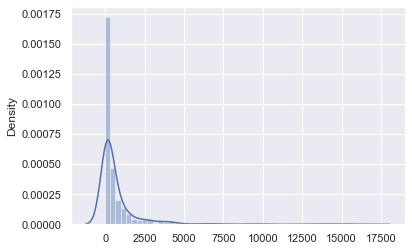

In [138]:
sns.distplot(y_train)
plt.show()

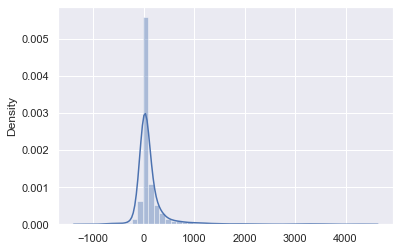

In [139]:
sns.distplot(X_train)
plt.show()

In [145]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.utils.validation import check_array

model = LinearRegression()
model = model.fit([X_train], [y_train])
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print(f"Test RMSE = {mse(y_test, y_pred, squared=False):.2f}")
print(f"Train RMSE = {mse(y_train, y_train_pred, squared=False):.2f}")

ValueError: Expected 2D array, got 1D array instead:
array=[  4.     73.486   4.835 ...  70.46  257.4    47.172].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

TypeError: loop of ufunc does not support argument 0 of type int which has no callable log method

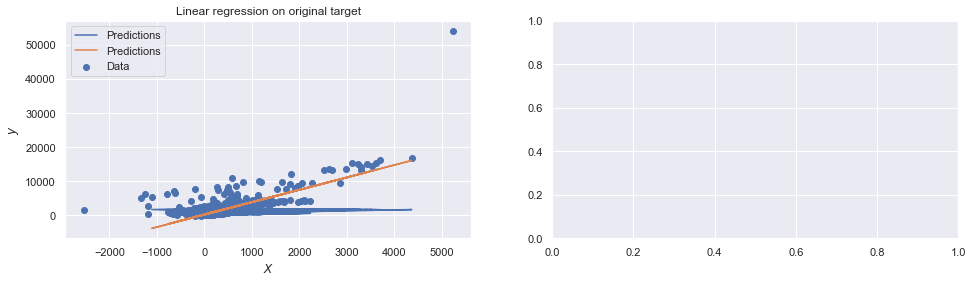

In [147]:
fig, axs = plt.subplots(figsize=(16, 4), ncols=2)


axs[0].scatter(X, y, label="Data")
axs[0].plot(X_train, y_train_pred, label="Predictions")
axs[0].legend()
axs[0].set_title("Linear regression on original target")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$y$")


y_log = np.log(y_train)
model.fit(X_train, y_log)
y_pred_log = np.exp(model.predict(X_train))
axs[1].scatter(X, y, label="Data")
axs[1].plot(x_train, y_pred_log, label="Predictions")
axs[1].set_title("Linear regression on log target")
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$y$")
plt.show()